# 6th : polynomial-regression

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [225]:
train = pd.read_csv("Desktop/polynomial-regression.csv")

In [226]:
train.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   araba_fiyat    15 non-null     int64
 1   araba_max_hiz  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [228]:
train.shape

(15, 2)

In [229]:
train.isna().sum()

araba_fiyat      0
araba_max_hiz    0
dtype: int64

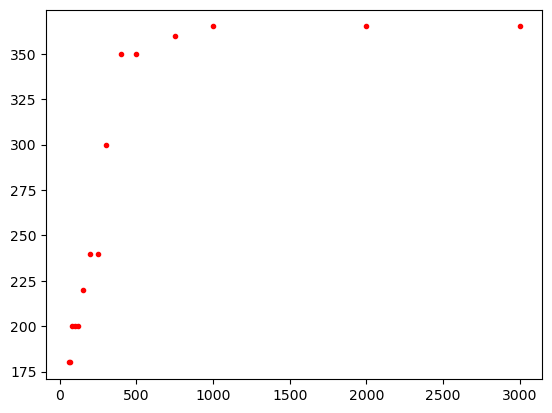

In [230]:
X = train.araba_fiyat
Y = train.araba_max_hiz
fig = plt.scatter(X , Y , marker = "." , c = "red")

# polynomial :(((( :

## Since we have only one feature, the following polynomial regression formula applies:

y = ß0 + ß1x + ß2x2 + … + ßnxn

In [231]:
from sklearn.preprocessing import PolynomialFeatures

In [232]:
model = PolynomialFeatures(degree = 2 , include_bias = False)
#include_bias=False should be set to False, because we’ll use PolynomialFeatures together with LinearRegression() later on.

In [233]:
model.fit(X.values.reshape(-1 , 1) , Y.values.reshape(-1 ,1))

PolynomialFeatures(include_bias=False)

In [234]:
X_test = model.fit_transform(X.values.reshape(-1 ,1))

In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
reg_model = LinearRegression()

In [237]:
reg_model.fit(X_test , Y.values.reshape(-1 , 1))

LinearRegression()

In [238]:
Y_test = reg_model.predict(X_test)

In [239]:
Y_test

array([[205.87620625],
       [208.35542668],
       [210.82082011],
       [215.71012591],
       [220.54412365],
       [227.69141764],
       [239.327034  ],
       [250.61697496],
       [261.56124055],
       [282.41274556],
       [301.88154904],
       [344.50423851],
       [378.48504339],
       [427.98941691],
       [339.22363684]])

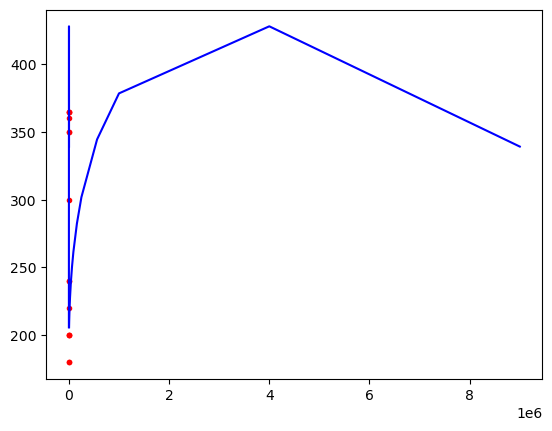

In [240]:
plt.scatter(train.araba_fiyat , train.araba_max_hiz , marker = '.' , c = "red")
plt.plot(X_test , Y_test , c = "blue")

In [241]:
reg_model.score(X_test, Y_test)

1.0

# :))))))))))))))))))))))))))))))))     score = 1  

# Hold up a minute! 😮 Isn’t this tutorial supposed to be about polynomial regression? Why are we importing LinearRegression then?

# Just think back to what you’ve read not so long ago: polynomial regression is a linear model, that’s why we import LinearRegression. 🙂

# Can we have a better model? try it:

In [242]:
from sklearn.preprocessing import PolynomialFeatures
model = PolynomialFeatures(degree = 2 , include_bias = False)
model.fit(X.values.reshape(-1 , 1))

PolynomialFeatures(include_bias=False)

In [243]:
X_test = model.fit_transform(X.values.reshape(-1 ,1))

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
model1 = PolynomialFeatures(degree=2, include_bias=False)
X_test = model1.fit_transform(X.values.reshape(-1 ,1))

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [247]:
X_train

8      300
2       80
1       70
14    3000
4      120
7      250
10     500
12    1000
3      100
6      200
Name: araba_fiyat, dtype: int64

In [248]:
X_test

9      400
11     750
0       60
13    2000
5      150
Name: araba_fiyat, dtype: int64

In [249]:
reg_model1 = LinearRegression()

In [250]:
reg_model1.fit(X_train.values.reshape(-1 ,1) , Y_train.values.reshape(-1 ,1))

LinearRegression()

In [251]:
reg_model1_predict = reg_model1.predict(X_test.values.reshape(-1 ,1))

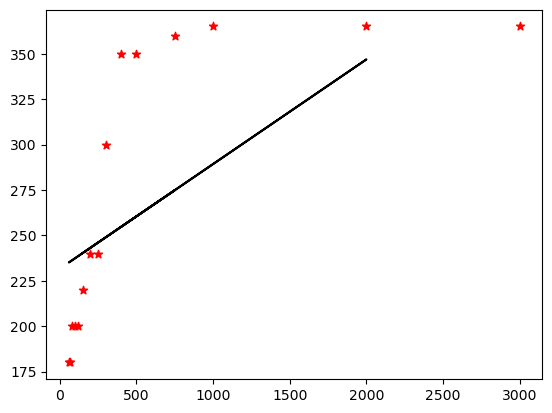

In [252]:
plt.scatter(X , Y , marker = "*" , c = "red")
plt.plot(X_test.values.reshape(-1 ,1) , reg_model1.predict(X_test.values.reshape(-1 ,1)) , c = "black")

# So I cant better that :( .... Could you improve that ?